<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>
<img src="./logo.png" alt="class.vision" style="width: 200px;"/>
<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">تغییر در طول بازه‌های زمانی ورودی شبکه</div></center></h1>

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
%matplotlib inline

t = np.arange(0,1500)
x = np.sin(0.02*t)+ np.random.rand(1500) * 2

train,test = x[0:1000], x[1000:]

# convert into dataset data and label
def convertToDataset(data, step):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

Using TensorFlow backend.


In [2]:
train_step = 10
test_step = 20

trainX,trainY =convertToDataset(train,train_step)
testX,testY =convertToDataset(test,test_step)

trainX = np.reshape(trainX, (trainX.shape[0],  trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))

In [3]:
print(trainX.shape)
print(testX.shape)

(990, 10, 1)
(480, 20, 1)


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">معماری شبکه و compile آن</div>


In [4]:
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(None, 1),  activation="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 64)                4224      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.input

<tf.Tensor 'simple_rnn_1_input:0' shape=(?, ?, 1) dtype=float32>

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">آموزش مدل</div>


<div style="direction:rtl;text-align:right;font-family:Tahoma">
حالا با این پیاده سازی به نظر شما میتوانیم در طول آموزش هم طول timestep متفاوت داشته باشیم؟<br>

</div>

In [7]:
history = model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)

Epoch 1/100
 - 4s - loss: 0.5067
Epoch 2/100
 - 0s - loss: 0.4110
Epoch 3/100
 - 0s - loss: 0.4095
Epoch 4/100
 - 0s - loss: 0.3995
Epoch 5/100
 - 1s - loss: 0.3934
Epoch 6/100
 - 0s - loss: 0.3865
Epoch 7/100
 - 0s - loss: 0.3920
Epoch 8/100
 - 1s - loss: 0.3851
Epoch 9/100
 - 1s - loss: 0.3858
Epoch 10/100
 - 0s - loss: 0.3869
Epoch 11/100
 - 0s - loss: 0.3804
Epoch 12/100
 - 0s - loss: 0.3806
Epoch 13/100
 - 0s - loss: 0.3736
Epoch 14/100
 - 0s - loss: 0.3740
Epoch 15/100
 - 0s - loss: 0.3662
Epoch 16/100
 - 0s - loss: 0.3708
Epoch 17/100
 - 0s - loss: 0.3668
Epoch 18/100
 - 0s - loss: 0.3632
Epoch 19/100
 - 0s - loss: 0.3697
Epoch 20/100
 - 0s - loss: 0.3612
Epoch 21/100
 - 0s - loss: 0.3619
Epoch 22/100
 - 0s - loss: 0.3577
Epoch 23/100
 - 0s - loss: 0.3577
Epoch 24/100
 - 0s - loss: 0.3534
Epoch 25/100
 - 0s - loss: 0.3537
Epoch 26/100
 - 0s - loss: 0.3556
Epoch 27/100
 - 0s - loss: 0.3499
Epoch 28/100
 - 0s - loss: 0.3484
Epoch 29/100
 - 0s - loss: 0.3455
Epoch 30/100
 - 0s - lo

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> ارزیابی مدل</div>

In [9]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

0.07633800416281729


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> رسم سری اصلی و پیش بینی برای داده های آموزشی و تست </div>


In [10]:
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

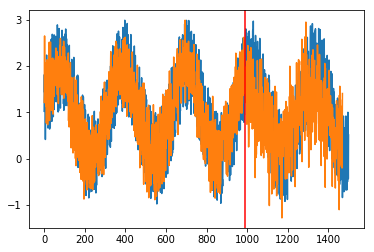

In [11]:
plt.plot(x)
plt.plot(predicted)
plt.axvline(len(trainX), c="r")
plt.show()

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> دوره پیشرفته یادگیری عمیق<br>علیرضا اخوان پور<br>  آبان و آذر 1399<br>
</div>
<a href="http://class.vision">Class.Vision</a> - <a href="http://AkhavanPour.ir">AkhavanPour.ir</a> - <a href="https://github.com/Alireza-Akhavan/">GitHub</a>

</div>